In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Plot the parameters of OBS Weibull results fo QC

In [2]:
# QC_method = 'QCv1_Flag1'
QC_method = 'QCv1_Flag_Rec'

In [3]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','stations','Italy_raingauges', 'QC')

In [4]:
METADATA = pd.read_csv(os.path.join(dir_base, 'METADATA', 'METADATA_INTENSE_UPDATE.csv'))
METADATA.head(2)

,File,ISO,Region,Code,Name,Elevatn,Or_EPSG,CRS_E,CRS_N,Lat,Lon,Yr_Strt,Yer_End,INTENSE,AGENCY,Source,TimeZon
0,IT-210_PIE-001030-900_0060_QCv1.csv,IT-210,Piedmont,PIE-001030-900,BORGOFRANCODIVREA,337.0,32632,410005.0,5040731.0,45.514302,7.847798,1988-05-08 05:00:00,2024-09-09 01:00:00,DT,ARPA Piemonte,Piedmont,UTC
1,IT-210_PIE-001097-900_0060_QCv1.csv,IT-210,Piedmont,PIE-001097-900,CUMIANA,327.0,32632,373092.0,4980177.0,44.963696,7.390821,1988-01-29 03:00:00,2024-09-18 12:00:00,DT,ARPA Piemonte,Piedmont,UTC


In [5]:
dir_read = os.path.join(dir_base, 'data_1h')
regions_ISO = [d for d in os.listdir(dir_read) if os.path.isdir(os.path.join(dir_read, d))]

In [6]:
dict_N = {}
dict_C = {}
dict_W = {}

for rr in range(len(regions_ISO)):#len(regions_ISO)
    region_ = regions_ISO[rr] 
    METADATA_clear = METADATA[METADATA['ISO']==region_].reset_index(inplace=False)

    print(f'Region: {region_} has {len(METADATA_clear)} stations')

    N, C, W = [], [], []
    for nn in range(len(METADATA_clear)):#len(METADATA_clear)

        filename = f'{METADATA_clear['File'].values[nn]}'
        STATS_pd = pd.read_csv(os.path.join(dir_base, 'DATA_1dy', 'statistics', QC_method, region_, filename))
        STATS_pd = STATS_pd[(STATS_pd['Year']>=2002)&(STATS_pd['Year']<=2023)]
        
        if len(STATS_pd) >= 16:
            N_ = STATS_pd.N.values
            C_ = STATS_pd.C.values
            W_ = STATS_pd.W.values
            
            N.extend(N_)
            C.extend(C_)
            W.extend(W_)

    dict_N[region_] = N
    dict_C[region_] = C
    dict_W[region_] = W

df_N = pd.DataFrame({k: pd.Series(v) for k, v in dict_N.items()})
df_C = pd.DataFrame({k: pd.Series(v) for k, v in dict_C.items()})
df_W = pd.DataFrame({k: pd.Series(v) for k, v in dict_W.items()})

# df_W = df_W.mask(df_W > 2, np.nan)
# df_C = df_C.mask(df_W > 2, np.nan)
# df_N = df_N.mask(df_W > 2, np.nan)

Region: IT-210 has 38 stations
Region: IT-230 has 69 stations
Region: IT-250 has 228 stations
Region: IT-321 has 97 stations
Region: IT-322 has 57 stations
Region: IT-340 has 213 stations
Region: IT-360 has 203 stations
Region: IT-420 has 153 stations
Region: IT-450 has 439 stations
Region: IT-520 has 408 stations
Region: IT-550 has 65 stations
Region: IT-570 has 42 stations
Region: IT-620 has 213 stations
Region: IT-670 has 22 stations
Region: IT-720 has 153 stations
Region: IT-750 has 36 stations
Region: IT-770 has 37 stations
Region: IT-780 has 158 stations
Region: IT-820 has 106 stations
Region: IT-880 has 95 stations


In [7]:
for pos in range(len(regions_ISO)):#len(regions_ISO)
    pre = df_N[regions_ISO[pos]].values
    pre_tmp = pre[~np.isnan(pre)]
    print(f'Region {regions_ISO[pos]} has {len(pre_tmp)} values')

Region IT-210 has 792 values
Region IT-230 has 883 values
Region IT-250 has 2202 values
Region IT-321 has 882 values
Region IT-322 has 1007 values
Region IT-340 has 3719 values
Region IT-360 has 2100 values
Region IT-420 has 1648 values
Region IT-450 has 4999 values
Region IT-520 has 6080 values
Region IT-550 has 1085 values
Region IT-570 has 280 values
Region IT-620 has 2436 values
Region IT-670 has 368 values
Region IT-720 has 3028 values
Region IT-750 has 144 values
Region IT-770 has 494 values
Region IT-780 has 1973 values
Region IT-820 has 2070 values
Region IT-880 has 1452 values


Text(0.5, 0, 'Regions')

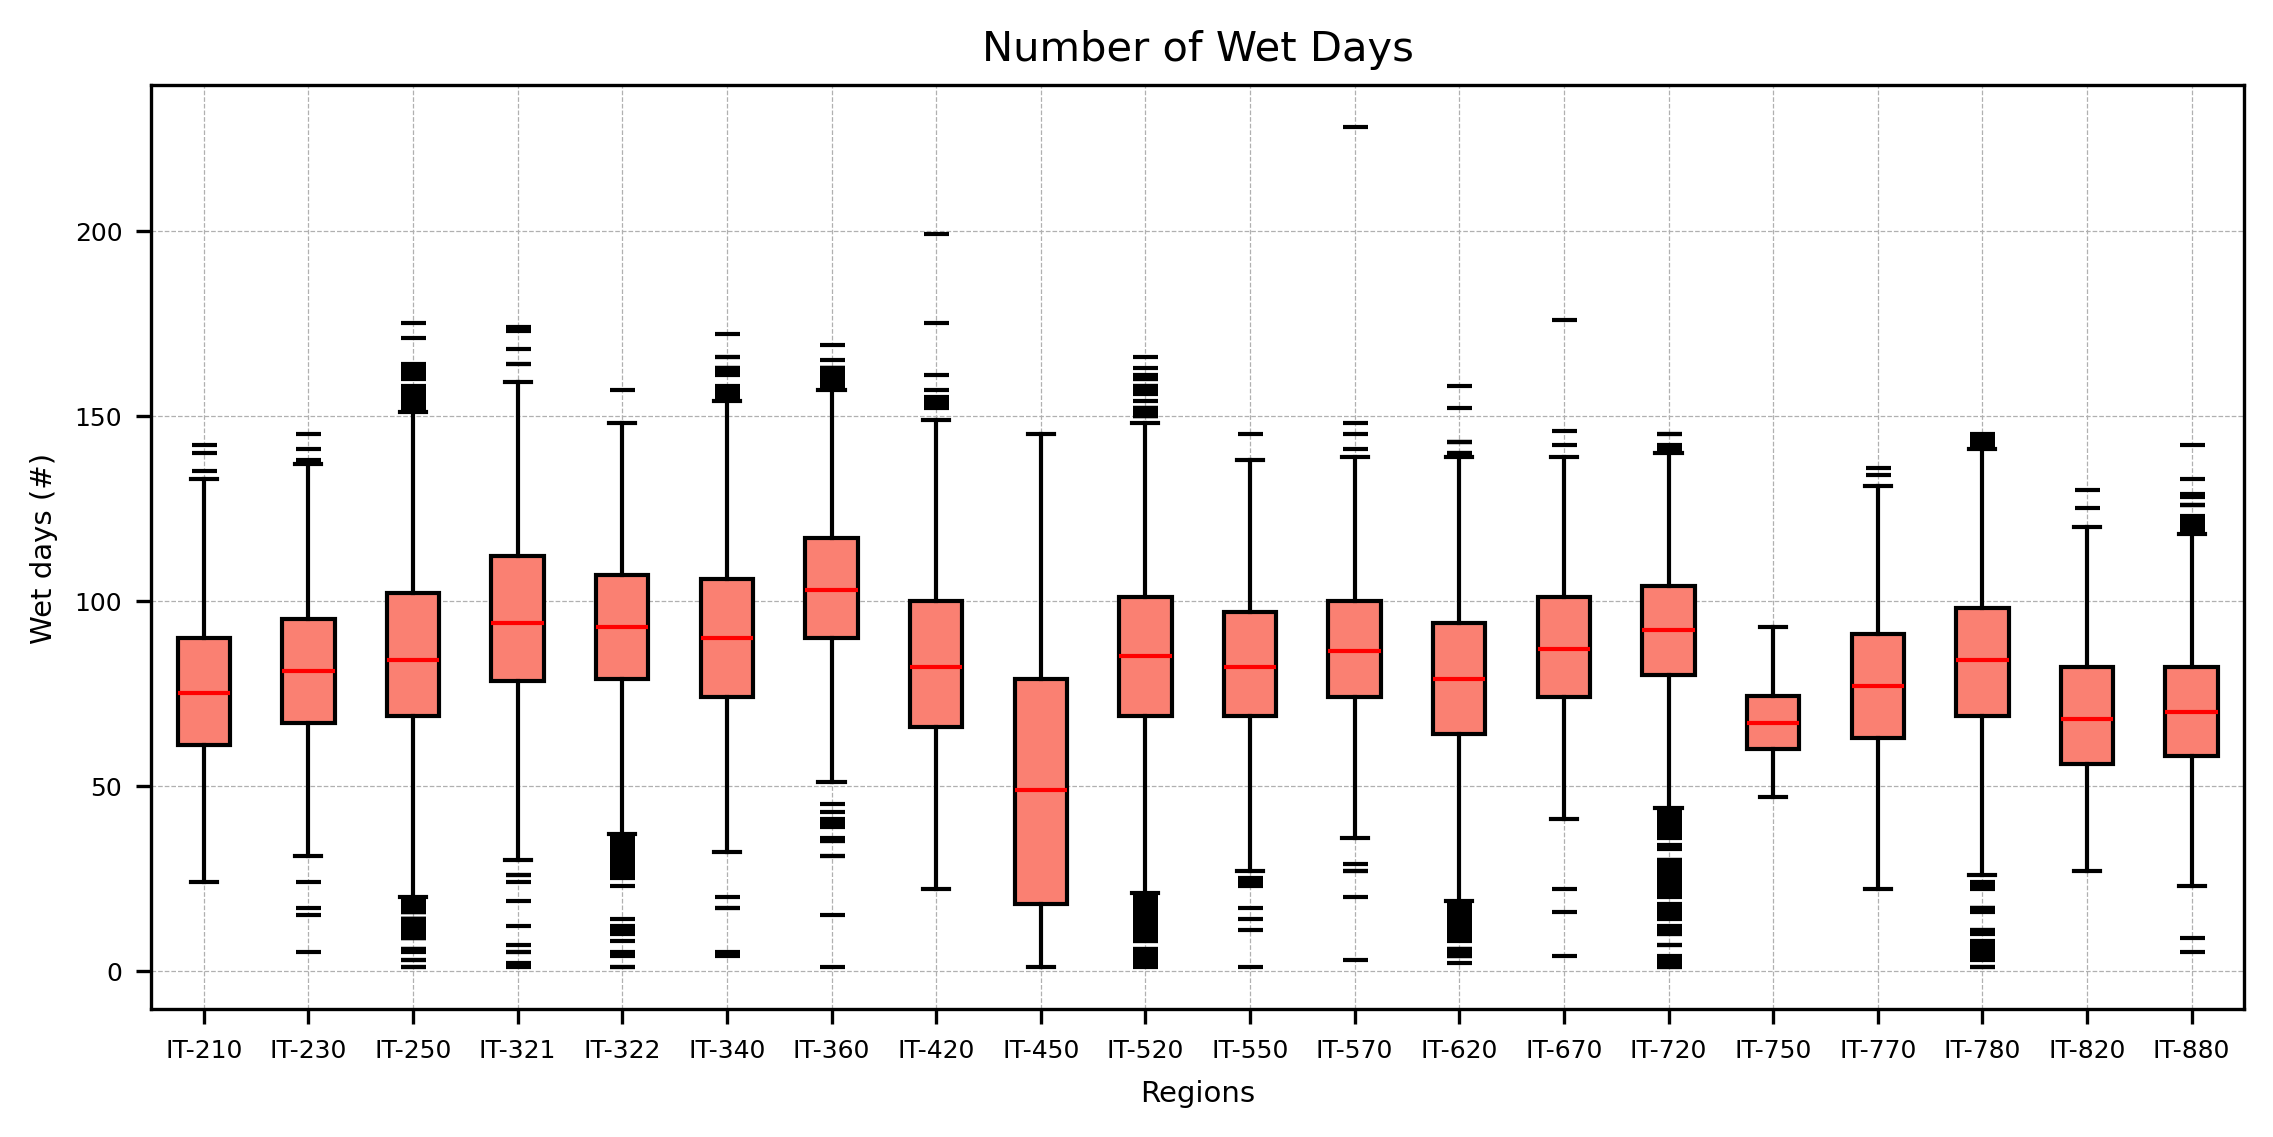

In [8]:
fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])

SAT_boxprops = dict(facecolor='salmon')
DOWN_boxprops = dict(facecolor='royalblue')

meanprops=dict(linestyle='-',color="g",linewidth=1)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1, color='r')

SAT_boxes = []
DOWN_boxes = []
medians = []
fliers = []
for pos in range(len(regions_ISO)):#len(regions_ISO)
    pre = df_N[regions_ISO[pos]].values
    pre_tmp = pre[~np.isnan(pre)]

    SAT_box = ax1.boxplot(pre_tmp,positions=[2*pos],
    widths=1,boxprops=SAT_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

ax1.set_xlim(-1,39)

ax1.set_xticks(np.arange(0,40,2))
ax1.set_xticklabels(regions_ISO)

ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_title('Number of Wet Days', fontsize=10, loc='center')
ax1.set_ylabel('Wet days (#)', fontsize=7)
ax1.set_xlabel('Regions', fontsize=7)

Text(0.5, 0, 'Regions')

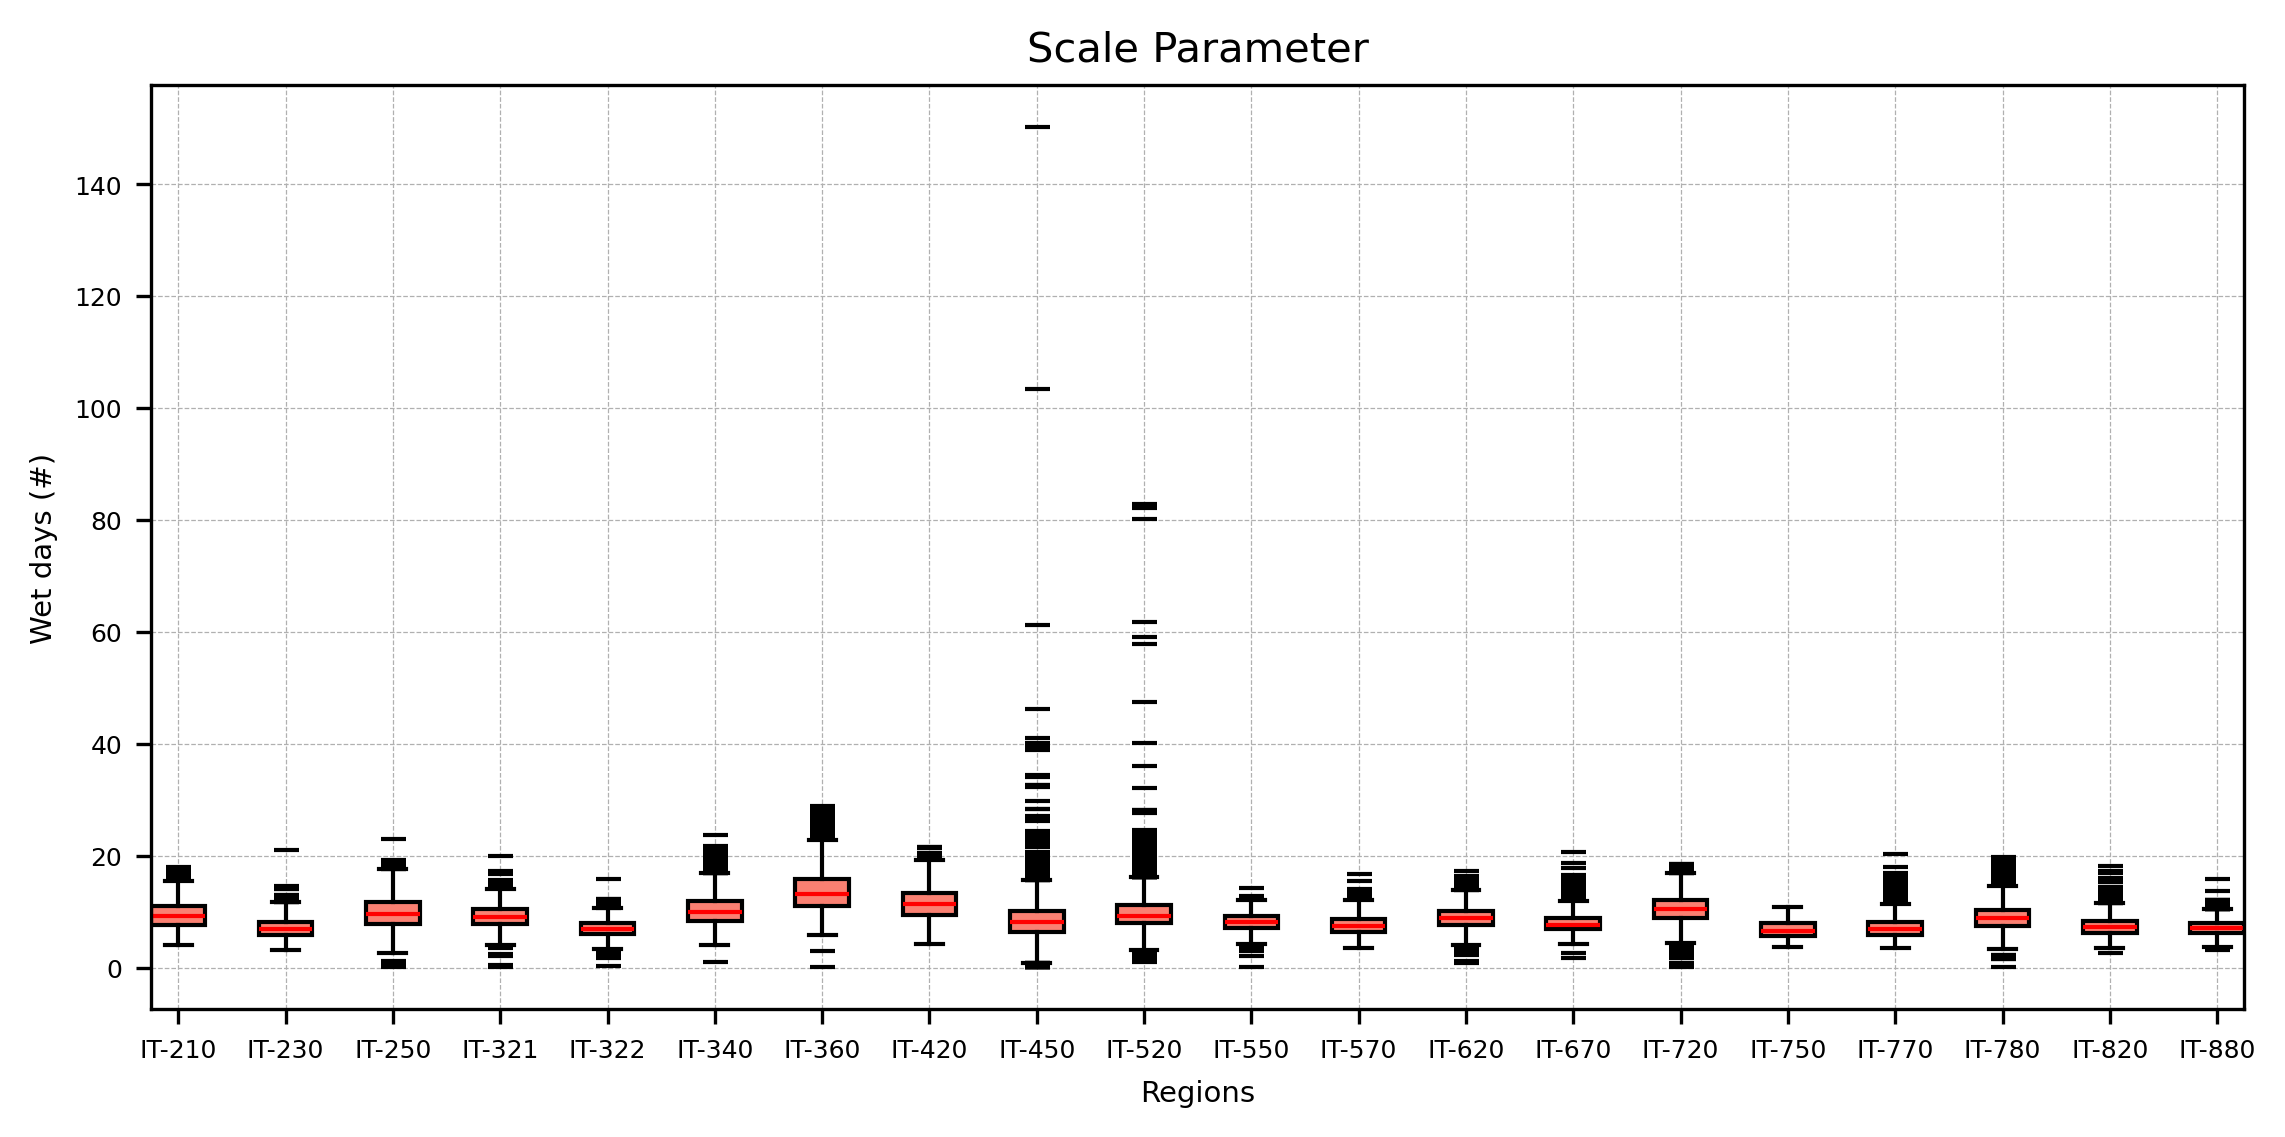

In [9]:
fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])

SAT_boxprops = dict(facecolor='salmon')
DOWN_boxprops = dict(facecolor='royalblue')

meanprops=dict(linestyle='-',color="g",linewidth=1)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1, color='r')

SAT_boxes = []
DOWN_boxes = []
medians = []
fliers = []
for pos in range(len(regions_ISO)):#len(regions_ISO)
    pre = df_C[regions_ISO[pos]].values
    pre_tmp = pre[~np.isnan(pre)]

    SAT_box = ax1.boxplot(pre_tmp,positions=[2*pos],
    widths=1,boxprops=SAT_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

# ax1.set_xlim(-1,39)

ax1.set_xticks(np.arange(0,40,2))
ax1.set_xticklabels(regions_ISO)

ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_title('Scale Parameter', fontsize=10, loc='center')
ax1.set_ylabel('Wet days (#)', fontsize=7)
ax1.set_xlabel('Regions', fontsize=7)

Text(0.5, 0, 'Regions')

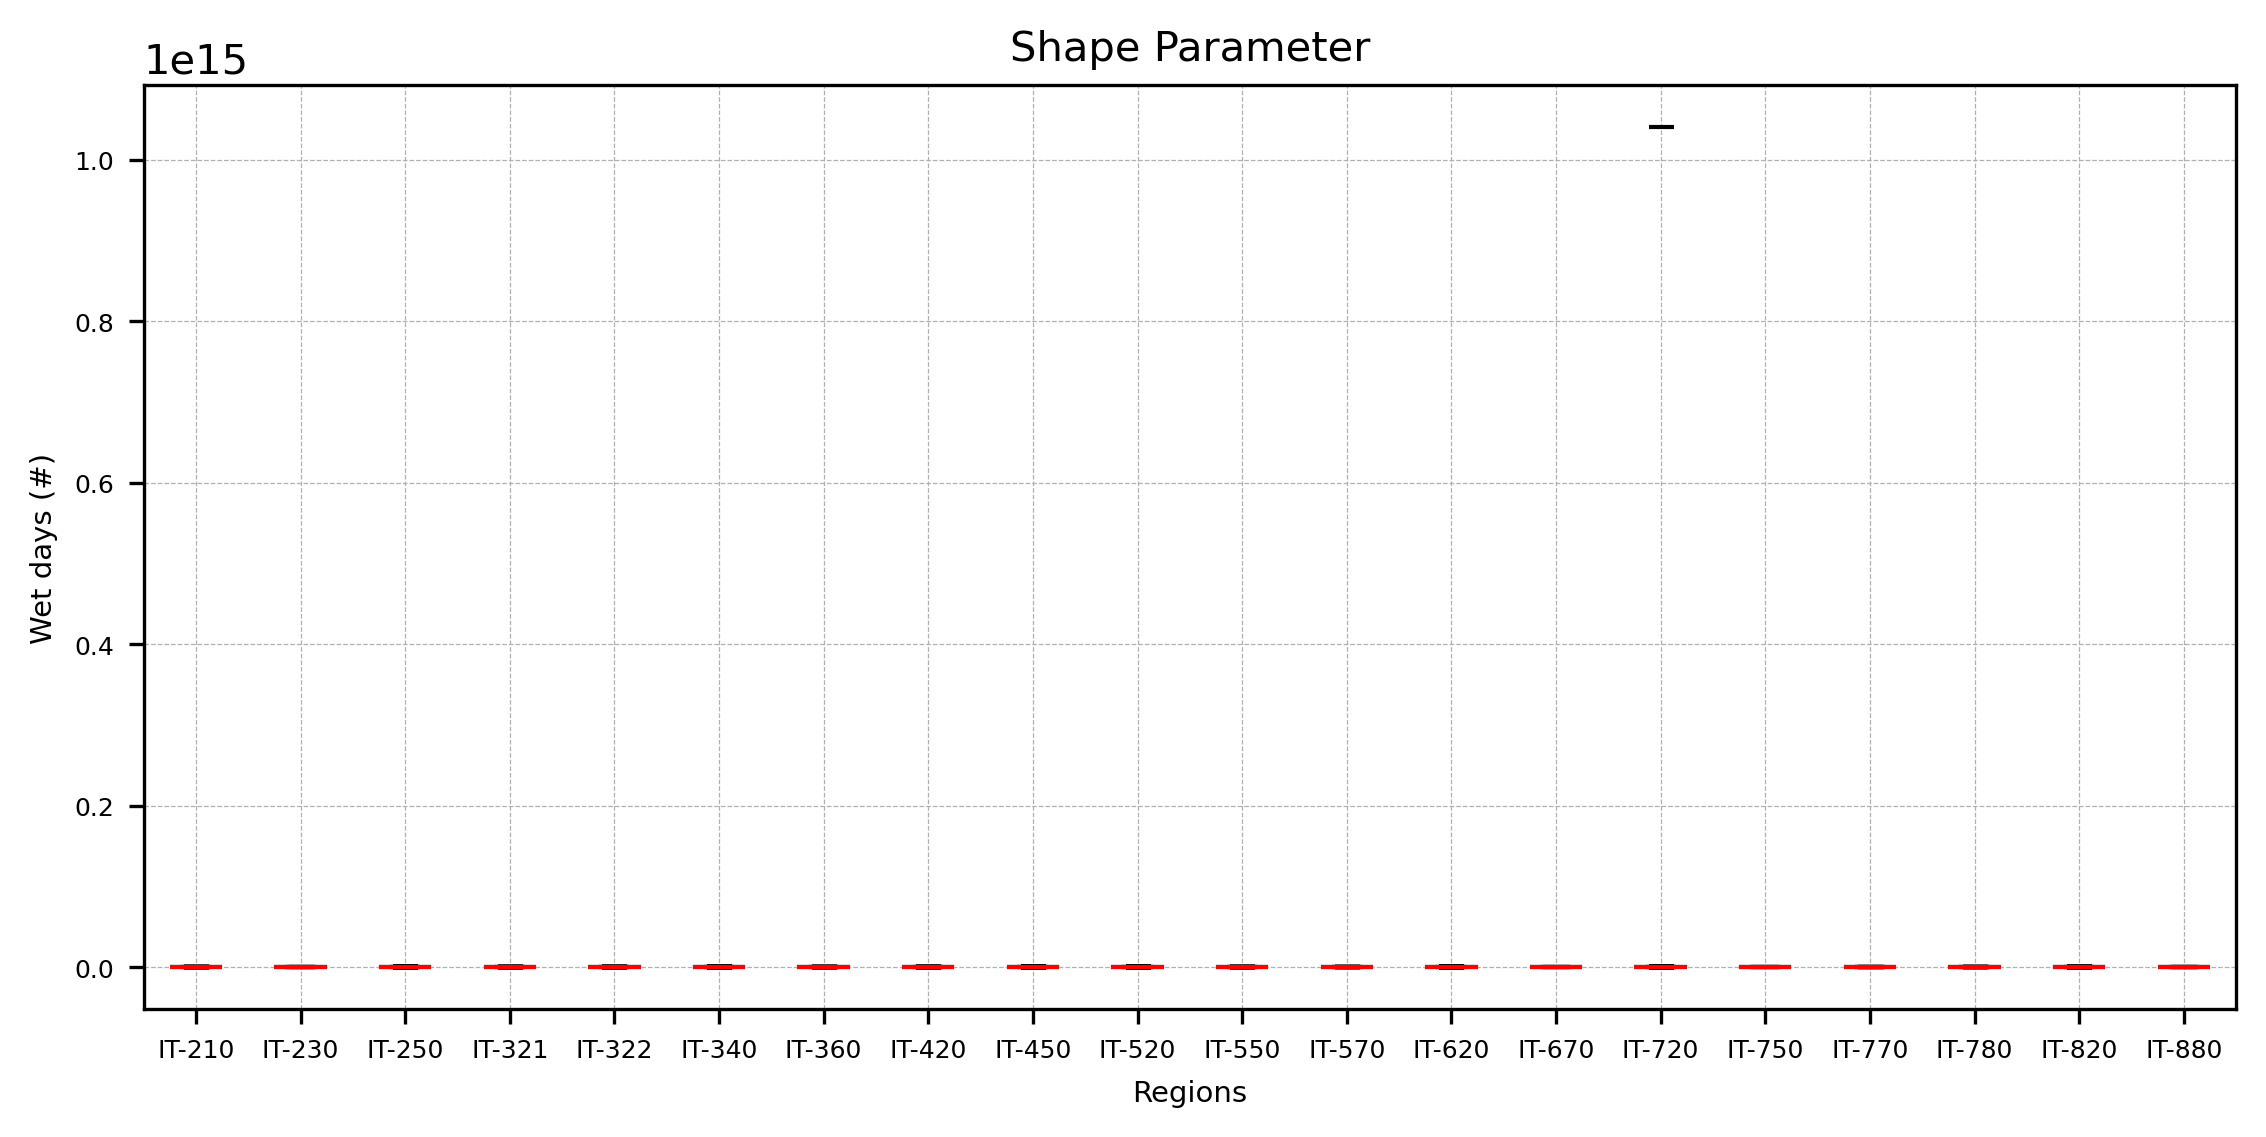

In [10]:
fig = plt.figure(figsize=(9,4),dpi=300)
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0, 0])

SAT_boxprops = dict(facecolor='salmon')
DOWN_boxprops = dict(facecolor='royalblue')

meanprops=dict(linestyle='-',color="g",linewidth=1)
flierprops = dict(marker='_',markeredgecolor='k',linewidth=1.5)
medianprops = dict(linestyle='-', linewidth=1, color='r')

SAT_boxes = []
DOWN_boxes = []
medians = []
fliers = []
for pos in range(len(regions_ISO)):#len(regions_ISO)
    pre = df_W[regions_ISO[pos]].values
    pre_tmp = pre[~np.isnan(pre)]

    SAT_box = ax1.boxplot(pre_tmp,positions=[2*pos],
    widths=1,boxprops=SAT_boxprops,
    showmeans=False,meanline=True,meanprops=meanprops,
    medianprops=medianprops,
    showfliers=True,flierprops=flierprops,
    patch_artist=True,notch=False)

ax1.set_xlim(-1,39)
# ax1.set_ylim(0,10)

ax1.set_xticks(np.arange(0,40,2))
ax1.set_xticklabels(regions_ISO)

ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_title('Shape Parameter', fontsize=10, loc='center')
ax1.set_ylabel('Wet days (#)', fontsize=7)
ax1.set_xlabel('Regions', fontsize=7)